In [30]:
import json
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import re
import seaborn as sns

In [31]:
wthr = pd.read_csv('../data/weather_updated.csv')

In [32]:
crps = pd.read_csv('../data/regions_eda.csv')

C:\Users\Aaron\AppData\Local\Temp\ipykernel_15648\467395438.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  crps = pd.read_csv('../data/regions_eda.csv')


In [33]:
crps = crps[crps['statisticcat_desc'] == 'YIELD']

In [34]:
wthr = wthr.groupby(['region','Year'])['prcp'].sum()

In [35]:
wthr

region         Year
NORTH CENTRAL  2002    1284.16
               2007    1531.47
               2012    1096.49
               2017    1498.93
NORTH EASTERN  2002    1597.06
               2007    1685.92
               2012    1575.19
               2017    1856.67
NORTH WEST     2002     389.03
               2007     389.95
               2012     528.03
               2017     524.69
SOUTH CENTRAL  2002    1050.56
               2007    1069.59
               2012     899.54
               2017    1060.99
SOUTH EASTERN  2002    1631.66
               2007    1229.69
               2012    1512.45
               2017    1720.80
SOUTH WEST     2002     323.59
               2007     323.73
               2012     398.54
               2017     468.98
Name: prcp, dtype: float64

In [36]:
crps = crps[crps['year'] != 2018]
crps

,Unnamed: 0,class_desc,group_desc,prodn_practice_desc,state_name,year,short_desc,sector_desc,domaincat_desc,cv (%),...,country_code,util_practice_desc,statisticcat_desc,unit_desc,agg_level_desc,domain_desc,value,reference_period_desc,region,value_lbs_acre
15,15,ALL CLASSES,FIELD CROPS,"IRRIGATED, NONE OF CROP",ALABAMA,2017,"BARLEY, IRRIGATED, NONE OF CROP - YIELD, MEASU...",CROPS,NOT SPECIFIED,12.9,...,9000,ALL UTILIZATION PRACTICES,YIELD,BU / ACRE,STATE,TOTAL,47.0,YEAR,SOUTH EASTERN,2632.0
39,39,ALL CLASSES,FIELD CROPS,"IRRIGATED, ENTIRE CROP",ALABAMA,2017,"CORN, GRAIN, IRRIGATED, ENTIRE CROP - YIELD, M...",CROPS,NOT SPECIFIED,5.6,...,9000,GRAIN,YIELD,BU / ACRE,STATE,TOTAL,183.1,YEAR,SOUTH EASTERN,10253.6
42,42,ALL CLASSES,FIELD CROPS,"IRRIGATED, ENTIRE CROP",ALABAMA,2017,"CORN, SILAGE, IRRIGATED, ENTIRE CROP - YIELD, ...",CROPS,NOT SPECIFIED,22,...,9000,SILAGE,YIELD,TONS / ACRE,STATE,TOTAL,16.2,YEAR,SOUTH EASTERN,16200.0
45,45,ALL CLASSES,FIELD CROPS,"IRRIGATED, NONE OF CROP",ALABAMA,2017,"CORN, GRAIN, IRRIGATED, NONE OF CROP - YIELD, ...",CROPS,NOT SPECIFIED,3.4,...,9000,GRAIN,YIELD,BU / ACRE,STATE,TOTAL,150.9,YEAR,SOUTH EASTERN,8450.4
48,48,ALL CLASSES,FIELD CROPS,"IRRIGATED, NONE OF CROP",ALABAMA,2017,"CORN, SILAGE, IRRIGATED, NONE OF CROP - YIELD,...",CROPS,NOT SPECIFIED,2.9,...,9000,SILAGE,YIELD,TONS / ACRE,STATE,TOTAL,13.8,YEAR,SOUTH EASTERN,13800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455595,455595,"SPRING, (EXCL DURUM)",FIELD CROPS,"IRRIGATED, NONE OF CROP",WYOMING,2002,"WHEAT, SPRING, (EXCL DURUM), IRRIGATED, NONE O...",CROPS,NOT SPECIFIED,NaN,...,9000,ALL UTILIZATION PRACTICES,YIELD,BU / ACRE,STATE,TOTAL,NaN,YEAR,NORTH WEST,NaN
455603,455603,WINTER,FIELD CROPS,"IRRIGATED, ENTIRE CROP",WYOMING,2002,"WHEAT, WINTER, IRRIGATED, ENTIRE CROP - YIELD,...",CROPS,NOT SPECIFIED,NaN,...,9000,ALL UTILIZATION PRACTICES,YIELD,BU / ACRE,STATE,TOTAL,55.6,YEAR,NORTH WEST,3113.6
455606,455606,WINTER,FIELD CROPS,"IRRIGATED, NONE OF CROP",WYOMING,2002,"WHEAT, WINTER, IRRIGATED, NONE OF CROP - YIELD...",CROPS,NOT SPECIFIED,NaN,...,9000,ALL UTILIZATION PRACTICES,YIELD,BU / ACRE,STATE,TOTAL,14.4,YEAR,NORTH WEST,806.4
455608,455608,WINTER,FIELD CROPS,"IRRIGATED, PART OF CROP",WYOMING,2002,"WHEAT, WINTER, IRRIGATED, PART OF CROP - YIELD...",CROPS,NOT SPECIFIED,NaN,...,9000,ALL UTILIZATION PRACTICES,YIELD,BU / ACRE,STATE,TOTAL,28.8,YEAR,NORTH WEST,1612.8


In [37]:
crps = crps.groupby(['region', 'year'])['value'].sum()

In [40]:

crps = pd.DataFrame(crps)

In [50]:
crps

value
region        year         
NORTH CENTRAL 2002  14248.2
              2007  13988.4
              2012  13011.0
              2017  15179.1
NORTH EASTERN 2002  14404.9
              2007  10174.7
              2012  12598.0
              2017  13364.3
NORTH WEST    2002   7498.4
              2007   6268.2
              2012   7091.4
              2017   7928.4
SOUTH CENTRAL 2002   4424.1
              2007   4045.9
              2012   3748.3
              2017   4163.2
SOUTH EASTERN 2002   7351.1
              2007   6401.9
              2012   9152.1
              2017   9051.8
SOUTH WEST    2002   8120.7
              2007   6420.1
              2012   6984.9
              2017   6891.9

In [41]:
wthr = pd.DataFrame(wthr)

In [44]:
print(len(wthr))
print(len(crps))

24
24


In [46]:
newdf = crps.merge(wthr, how='right',left_on='year', right_on='Year')

In [51]:
newdf.to_csv('corr.csv', index = True)
print('\nCSV String:\n', 'corr_csv')


CSV String:
 corr_csv


In [47]:
newdf

,value,prcp
0,14248.2,1284.16
1,14404.9,1284.16
2,7498.4,1284.16
3,4424.1,1284.16
4,7351.1,1284.16
...,...,...
139,13364.3,468.98
140,7928.4,468.98
141,4163.2,468.98
142,9051.8,468.98


[[1.         0.01266774]
 [0.01266774 1.        ]]


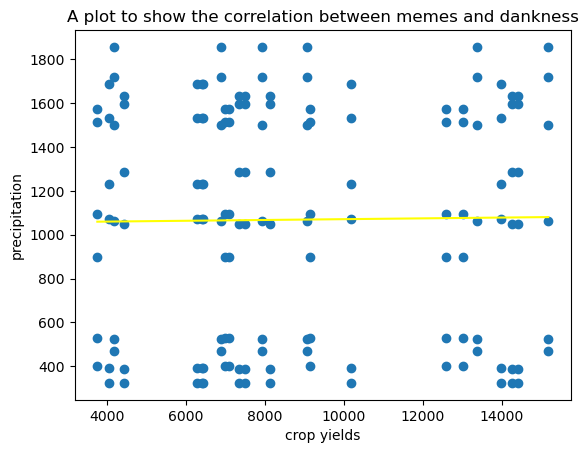

In [49]:
x = newdf['value']
y = newdf['prcp']

print(np.corrcoef(x, y))

plt.scatter(x, y) 
plt.title('A plot to show the correlation between memes and dankness')
plt.xlabel('crop yields')
plt.ylabel('precipitation')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='yellow')
plt.show()